In [ ]:
import keras
import pandas as pd
import numpy as np 
import matplotlib as plt

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [314]:
keras.optimizers.SGD(lr=0.005, momentum=0.9, decay=0.0, nesterov=False)
model = build_model()
num_epochs = 80
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=num_epochs,batch_size=1024)


Epoch 1/80
21504/60000 [=========>....................] - ETA: 2s - loss: 2.3000 - acc: 0.1115

InternalError: cuDNN Backward Filter function launch failure : input shape([1024,8,13,13]) filter shape([3,3,8,16])
	 [[Node: training_11/SGD/gradients/conv2d_35/convolution_grad/Conv2DBackpropFilter = Conv2DBackpropFilter[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](max_pooling2d_23/MaxPool, ConstantFolding/training_11/SGD/gradients/conv2d_35/convolution_grad/ShapeN-matshapes-1, training_11/SGD/gradients/conv2d_35/Relu_grad/ReluGrad)]]

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
acc = history.history['acc']
print(test_acc)

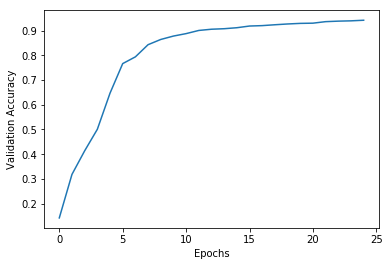

In [44]:
import matplotlib.pyplot as plt

plt.plot(acc)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

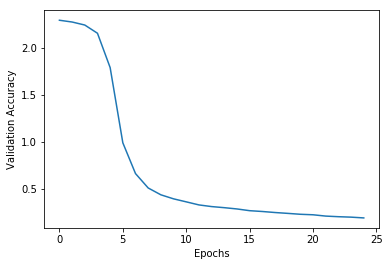

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

In [46]:
test_predictions = model.predict(test_images)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, test_predictions)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [49]:
print(test_predictions.shape)
print(test_labels.shape)

(10000, 10)
(10000, 10)


array([[4.0548534e-06, 2.0366676e-06, 1.2137097e-04, ..., 9.9901056e-01,
        2.6469486e-06, 2.3426974e-04],
       [5.2893581e-04, 4.5369129e-04, 9.8056740e-01, ..., 3.3826790e-09,
        2.5590998e-03, 2.6484999e-09],
       [1.9503694e-05, 9.9451160e-01, 6.0244690e-04, ..., 1.9236499e-03,
        1.1463476e-03, 8.6243133e-05],
       ...,
       [6.2270931e-07, 2.8494108e-07, 2.6877515e-06, ..., 1.6572486e-04,
        6.6577230e-04, 1.2618587e-03],
       [1.4190574e-04, 1.1213214e-04, 1.6047879e-05, ..., 1.1031112e-05,
        2.3797877e-02, 7.4551099e-06],
       [2.7378500e-04, 2.3003953e-07, 3.9762473e-03, ..., 2.0266193e-09,
        4.3588694e-05, 2.2906796e-07]], dtype=float32)

In [52]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [56]:
train_labels[3,:]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [84]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
enc.fit(X)


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='ignore', n_values='auto', sparse=True)

In [113]:
Y = enc.transform(X).toarray()

In [302]:
n_samples = len(test_labels)
n_features = len(test_labels.transpose())
out = test_labels.astype(int)
recovered_X = np.array([enc.active_features_[col] for col in out]).reshape(n_samples, n_features) - enc.feature_indices_[:-1]#


In [303]:
range(len(out))

range(0, 10000)

In [304]:
G = []
for row in range(len(out)): #out[row].all() == Y[col].all():
    for col in enc.active_features_: # (
        if (out[row]*Y[col]).any():
            G = np.append(G,enc.active_features_[col])


In [306]:
G.shape

(10000,)

In [166]:
out[1].any() != Y[1].any()

False

In [174]:
out[1].any() != Y[2].any()

False

In [186]:
out.shape

(60000, 10)

In [226]:
G = []
for row in range(len(out)):
    for F in range(len(enc.active_features_)):
        if (out[row]*Y[F]).any():
            G = np.append(G,enc.active_features_[F])

In [229]:
out = test_predictions.astype(int)

In [263]:
H = []
A = model.predict(test_images)
for row in range(len(A)):
    H = np.append(H,(np.where(A[row]==max(A[row]))))
H = H.astype(int)

In [308]:
test_predictions = model.predict(test_images)
from sklearn.metrics import confusion_matrix
confusion_matrix(G, H)

array([[ 958,    0,    1,    0,    1,    6,   10,    1,    3,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    0,    9,    0],
       [   7,    0,  981,    9,    9,    2,    6,    6,   12,    0],
       [   2,    2,   12,  942,    0,   24,    2,    8,   17,    1],
       [   1,    1,    4,    0,  954,    0,   10,    1,    3,    8],
       [   5,    3,    3,   17,    6,  831,   12,    1,   12,    2],
       [   9,    3,    1,    1,    7,   10,  923,    1,    3,    0],
       [   0,    7,   27,    6,   12,    1,    0,  953,    5,   17],
       [   5,    1,    4,   15,   11,   12,   11,    5,  905,    5],
       [  10,    8,    0,    9,  150,    9,    1,   10,   13,  799]])

In [307]:
print(H.shape)
print(G.shape)

(10000,)
(10000,)


10000